# Analysis of FAA Air Incidents Data

Data set source: https://www.kaggle.com/prathamsharma123/aviation-accidents-and-incidents-ntsb-faa-waas?select=faa_incidents_data.csv

### IN3061/INM430 Principles of Data Science | RAJANI MOHAN JANIPALLI | City University of London

##### About Data set
Data set is a record for general aviation and commercial air incidents from the year 1978 to 2015, collected from FAA’s AIDS website.

Import useful libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data. Code reference: lab week two feedback.

In [2]:
av_data = pd.read_csv('faa_incidents_data.csv', encoding = 'ISO-8859-1')

C:\Users\jraja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Have a glance of data frame. Code reference: Data camp course on data manipulation with pandas.

In [3]:
av_data.head()

,AIDS Report Number,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,...,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,,.1
0,19780101000019I,01-JAN-78,WAHPETON,ND,BRECKENRIDGE,INCIDENT,MINOR,ROLL-OUT (FIXED WING),CESSNA,182,...,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,245.0,136.0,0.0,0.0
1,19780101000029I,01-JAN-78,FAIRBANKS,AK,FAIRBANKS INTL,INCIDENT,MINOR,ROLL-OUT (FIXED WING),PIPER,PA18,...,0,NaN,NaN,NaN,1.0,STUDENT,200.0,2.0,0.0,0.0
2,19780101000039I,01-JAN-78,BRUNSWICK,GA,JEKYLL ISLAND,INCIDENT,NaN,NORMAL CRUISE,BEECH,35,...,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,NaN,0.0,0.0,0.0
3,19780101000049I,01-JAN-78,CARLSBAD,CA,MC CLELLAN-PALOMAR,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,310,...,0,NaN,NaN,NaN,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0,400.0,0.0,0.0
4,19780101000059I,01-JAN-78,TROUTDALE,OR,TROUTDALE MUNI,INCIDENT,MINOR,"GROUND TAXI, OTHER AIRPLANE",CESSNA,172,...,0,NaN,NaN,NaN,1.0,COMMERCIAL PILOT,300.0,130.0,0.0,0.0


Check the number of rows and columns of the data frame. Code reference: data camp course on data manipulation with pandas.

In [4]:
av_data.shape

(100000, 27)

Data frame Information - Check the names, data type and the number of non-missing values for all the columns in the data frame. Code reference: data camp course on data manipulation with pandas.

In [5]:
av_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   AIDS Report Number                100000 non-null  object 
 1   Local Event Date                  100000 non-null  object 
 2   Event City                        91364 non-null   object 
 3   Event State                       99234 non-null   object 
 4   Event Airport                     81398 non-null   object 
 5   Event Type                        100000 non-null  object 
 6   Aircraft Damage                   71199 non-null   object 
 7   Flight Phase                      99758 non-null   object 
 8   Aircraft Make                     97441 non-null   object 
 9   Aircraft Model                    96928 non-null   object 
 10  Aircraft Series                   96927 non-null   object 
 11  Operator                          29974 non-null   ob

The first thing observed from Date frame Information is that the "Local Event Date" column which contains the dates of the incident, is of object data type. But it should be of datetime data type.

#### Preliminary data cleaning.

So, the "Local Event Date" column has to be converted from object data type to datetime data type. Code reference: https://www.youtube.com/watch?v=yCgJGsg0Xa4

In [6]:
av_data['Local Event Date'] = pd.to_datetime(av_data['Local Event Date'])

View data frame information again to check if the changes have been implemented.

In [7]:
av_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   AIDS Report Number                100000 non-null  object        
 1   Local Event Date                  100000 non-null  datetime64[ns]
 2   Event City                        91364 non-null   object        
 3   Event State                       99234 non-null   object        
 4   Event Airport                     81398 non-null   object        
 5   Event Type                        100000 non-null  object        
 6   Aircraft Damage                   71199 non-null   object        
 7   Flight Phase                      99758 non-null   object        
 8   Aircraft Make                     97441 non-null   object        
 9   Aircraft Model                    96928 non-null   object        
 10  Aircraft Series                  

Have a glance of data frame again to check how the “Local Event Date” column data appears after the change of data type.

In [8]:
av_data.head()

,AIDS Report Number,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,...,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,,.1
0,19780101000019I,1978-01-01,WAHPETON,ND,BRECKENRIDGE,INCIDENT,MINOR,ROLL-OUT (FIXED WING),CESSNA,182,...,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,245.0,136.0,0.0,0.0
1,19780101000029I,1978-01-01,FAIRBANKS,AK,FAIRBANKS INTL,INCIDENT,MINOR,ROLL-OUT (FIXED WING),PIPER,PA18,...,0,NaN,NaN,NaN,1.0,STUDENT,200.0,2.0,0.0,0.0
2,19780101000039I,1978-01-01,BRUNSWICK,GA,JEKYLL ISLAND,INCIDENT,NaN,NORMAL CRUISE,BEECH,35,...,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,NaN,0.0,0.0,0.0
3,19780101000049I,1978-01-01,CARLSBAD,CA,MC CLELLAN-PALOMAR,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,310,...,0,NaN,NaN,NaN,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0,400.0,0.0,0.0
4,19780101000059I,1978-01-01,TROUTDALE,OR,TROUTDALE MUNI,INCIDENT,MINOR,"GROUND TAXI, OTHER AIRPLANE",CESSNA,172,...,0,NaN,NaN,NaN,1.0,COMMERCIAL PILOT,300.0,130.0,0.0,0.0


Check missing values. Code reference: https://www.kaggle.com/itssuru/eda-cristiano-ronaldo-s-career

In [9]:
missing_originaldata = pd.DataFrame({'total_missing': av_data.isnull().sum(), 
                             'perc_missing': (av_data.isnull().sum()/av_data.shape[0])*100})
missing_originaldata

,total_missing,perc_missing
AIDS Report Number,0,0.000
Local Event Date,0,0.000
Event City,8636,8.636
Event State,766,0.766
Event Airport,18602,18.602
Event Type,0,0.000
Aircraft Damage,28801,28.801
Flight Phase,242,0.242
Aircraft Make,2559,2.559
Aircraft Model,3072,3.072


#### Exploratory data analysis.

##### Data preparation

Checking of missing values has shown that there are a lot of missing values in many columns and also the names of the last two columns are also missing. To confirm, column names of the data frame are to be checked exclusively.

Check column names of the data frame. Code reference: data camp course on data manipulation with pandas.

In [10]:
av_data.columns

Index(['AIDS Report Number', 'Local Event Date', 'Event City', 'Event State',
       'Event Airport', 'Event Type', 'Aircraft Damage', 'Flight Phase',
       'Aircraft Make', 'Aircraft Model', 'Aircraft Series', 'Operator',
       'Primary Flight Type', 'Flight Conduct Code', 'Flight Plan Filed Code',
       'Aircraft Registration Nbr', 'Total Fatalities', 'Total Injuries',
       'Aircraft Engine Make', 'Aircraft Engine Model', 'Engine Group Code',
       'Nbr of Engines', 'PIC Certificate Type', 'PIC Flight Time Total Hrs',
       'PIC Flight Time Total Make-Model', ' ', ' .1'],
      dtype='object')

So, it is confirmed that the names of last two columns are missing. Temporary names of those two columns are to be assigned in order to make them callable. Code Reference: https://www.youtube.com/watch?v=0uBirYFhizE

In [11]:
av_data.rename(columns={' ':'UC1',' .1':'UC2'}, inplace=True)

Check if the changes in column names have been implemented.

In [12]:
av_data.columns

Index(['AIDS Report Number', 'Local Event Date', 'Event City', 'Event State',
       'Event Airport', 'Event Type', 'Aircraft Damage', 'Flight Phase',
       'Aircraft Make', 'Aircraft Model', 'Aircraft Series', 'Operator',
       'Primary Flight Type', 'Flight Conduct Code', 'Flight Plan Filed Code',
       'Aircraft Registration Nbr', 'Total Fatalities', 'Total Injuries',
       'Aircraft Engine Make', 'Aircraft Engine Model', 'Engine Group Code',
       'Nbr of Engines', 'PIC Certificate Type', 'PIC Flight Time Total Hrs',
       'PIC Flight Time Total Make-Model', 'UC1', 'UC2'],
      dtype='object')

Explore the data of the penultimate column. Code reference: https://www.kaggle.com/itssuru/eda-cristiano-ronaldo-s-career

In [13]:
av_data.UC1.value_counts()

0.0        20908
30.0        3128
20.0        3112
10.0        2386
50.0        2358
           ...  
465.0          1
948.0          1
456.0          1
458.0          1
99999.0        1
Name: UC1, Length: 458, dtype: int64

With 458 different values, the data in this column is difficult to correlate and understand the relationship with other columns in the data frame and there is no further information about this column. Hence it is better to drop this column.

Explore the date of the last column.

In [14]:
av_data.UC2.value_counts()

0.0      19796
20.0      2513
10.0      2319
30.0      2255
15.0      1975
         ...  
356.0        1
389.0        1
753.0        1
337.0        1
715.0        1
Name: UC2, Length: 390, dtype: int64

With 390 different values, the data in this column is difficult to correlate and understand the relationship with other columns in the data frame and there is no further information about this column. Hence it is better to drop this column.

Drop the penultimate column of the Data Frame. Code reference: https://www.kaggle.com/itssuru/eda-cristiano-ronaldo-s-career

In [15]:
av_data.drop('UC1',axis=1,inplace=True)

Drop the last column of the Data Frame.

In [16]:
av_data.drop('UC2',axis=1,inplace=True)

Check the change in number of columns of the data frame.

In [17]:
av_data.shape

(100000, 25)

Number of columns of the data frame changed from 27 to 25.

Explore all columns of the data frame and drop unnecessary columns.

Explore the first column of the data frame.

In [18]:
av_data['AIDS Report Number'].value_counts()

19780101000019I    1
19961008045849I    1
19961012040269I    1
19961012038109I    1
19961012037649I    1
                  ..
19861001064479I    1
19861001063409I    1
19861001056879I    1
19861001056419I    1
20151218024182I    1
Name: AIDS Report Number, Length: 100000, dtype: int64

It can be seen that each observation of this column is a unique ID number and it cannot be used for any further analysis. Hence it is better to drop this column.

In [19]:
av_data.drop('AIDS Report Number',axis=1,inplace=True)

Check the change in number of columns of the data frame.

In [20]:
av_data.shape

(100000, 24)

Changes in the column numbers are reflected.

Explore “Local Event Date” column.

In [21]:
av_data['Local Event Date'].value_counts()

1996-06-01    31
1980-07-19    29
1978-06-25    29
1979-07-29    28
1978-03-10    28
              ..
2011-09-19     1
2014-10-18     1
1984-10-19     1
2007-05-17     1
2008-11-08     1
Name: Local Event Date, Length: 13736, dtype: int64

With 13736 unique values this column will be difficult to plot and do further exploratory analysis. A better idea would be to create a column containing only year’s so that the number of unique values will be low enough that it can be plotted easily and also explored further.

##### Data derivation

Create a new column from “Local Event Date” column that would contain only the year and not the date and month.Code reference: https://www.youtube.com/watch?v=yCgJGsg0Xa4

In [22]:
av_data['Year'] = av_data['Local Event Date'].dt.year

Check the addition of column in the Data frame.

In [23]:
av_data.head()

,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,Aircraft Series,...,Total Fatalities,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,Year
0,1978-01-01,WAHPETON,ND,BRECKENRIDGE,INCIDENT,MINOR,ROLL-OUT (FIXED WING),CESSNA,182,UNDESIGNATED SERIES,...,0,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,245.0,136.0,1978
1,1978-01-01,FAIRBANKS,AK,FAIRBANKS INTL,INCIDENT,MINOR,ROLL-OUT (FIXED WING),PIPER,PA18,150,...,0,0,NaN,NaN,NaN,1.0,STUDENT,200.0,2.0,1978
2,1978-01-01,BRUNSWICK,GA,JEKYLL ISLAND,INCIDENT,NaN,NORMAL CRUISE,BEECH,35,B35,...,0,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,NaN,0.0,1978
3,1978-01-01,CARLSBAD,CA,MC CLELLAN-PALOMAR,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,310,L,...,0,0,NaN,NaN,NaN,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0,400.0,1978
4,1978-01-01,TROUTDALE,OR,TROUTDALE MUNI,INCIDENT,MINOR,"GROUND TAXI, OTHER AIRPLANE",CESSNA,172,UNDESIGNATED SERIES,...,0,0,NaN,NaN,NaN,1.0,COMMERCIAL PILOT,300.0,130.0,1978


In [24]:
av_data.shape

(100000, 25)

##### Data preparation

Since the year column is created the “local event date column can be dropped.

In [25]:
av_data.drop('Local Event Date',axis=1,inplace=True)

Check the changes in the number of columns.

In [26]:
av_data.shape

(100000, 24)

Explore “Event Type” column.

In [27]:
av_data['Event Type'].value_counts()

INCIDENT    100000
Name: Event Type, dtype: int64

It can be seen that all the observations are the same i.e., INCIDENT and it cannot be used for any further analysis. Hence it is better to drop this column.

In [28]:
av_data.drop('Event Type',axis=1,inplace=True)

Check the changes in the number of columns.

Explore “Aircraft Registration Nbr” column.

In [29]:
av_data['Aircraft Registration Nbr'].value_counts()

UNKNO    308
NONE     202
115BS     20
116BS     18
2718Y     16
        ... 
8305D      1
95955      1
6114U      1
37356      1
902AR      1
Name: Aircraft Registration Nbr, Length: 75883, dtype: int64

Explore “Total Fatalities” column.

In [30]:
av_data['Total Fatalities'].value_counts()

0    99227
1      730
2       39
3        3
5        1
Name: Total Fatalities, dtype: int64

Explore “Total Injuries” column.

<AxesSubplot:>

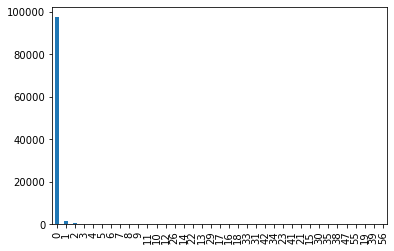

In [31]:
av_data['Total Injuries'].value_counts().plot.bar()

Check the number of possible observations for a combination of values of total fatalities and total injuries which can be categorized as severe. Code reference: data camp course on data manipulation with pandas.

In [32]:
av_data[(av_data['Total Fatalities'] >= 1) & (av_data['Total Injuries'] == 0)]

,Event City,Event State,Event Airport,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,Aircraft Series,Operator,Primary Flight Type,...,Total Fatalities,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,Year
582,ZEPHYRHILLS,FL,ZEPHYRHILLS MUNI,NaN,DESCENT,BEECH,18,D18S,NaN,OTHER,...,1,0,NaN,NaN,NaN,2.0,NaN,NaN,0.0,1978
638,COOLIDGE,AZ,FLORENCE MUNI,NaN,DESCENT,CESSNA,182,A,NaN,OTHER,...,1,0,NaN,NaN,NaN,1.0,COMMERCIAL PILOT,750.0,200.0,1978
933,HENDERSON,NC,OXFORD COUNTY RGNL,NaN,LEVEL OFF TOUCHDOWN,DOUGLAS,DC3,C,NaN,OTHER,...,1,0,NaN,NaN,NaN,2.0,COMMERCIAL PILOT,1350.0,50.0,1978
1095,NaN,CA,SKYLARK FIELD,NaN,LEVEL OFF TOUCHDOWN,NaN,NaN,NaN,NaN,OTHER,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1978
1121,TULSA,OK,TULSA INTL,SUBSTANTIAL,"GROUND TAXI, OTHER AIRPLANE",BOEING,727,200,CONTINENTAL AIRLINES INC,SCHEDULED AIR CARRIER,...,5,0,NaN,NaN,NaN,3.0,AIRLINE TRANSPORT,13000.0,4000.0,1978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99790,TRES PINOS,CA,NaN,NONE,OTHER-SPECIFY,PAC,750XL,NO SERIES EXISTS,NaN,NaN,...,1,0,P & W,PT6A-34,NaN,1.0,NaN,NaN,NaN,2015
99814,SEBASTIAN,FL,SEBASTIAN MUNI,NONE,CRUISE-LEVEL FLIGHT,DE HAVILLAND,DHC6,200,NaN,NaN,...,1,0,P&W,PT6A SER,NaN,NaN,NaN,NaN,NaN,2015
99874,LATROBE,PA,ARNOLD PALMER RGNL,NONE,UNKNOWN,GRUMMAN,G1159,NO SERIES EXISTS,NaN,NaN,...,1,0,ROLLS-,SPEY 506-14,NaN,NaN,AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR,NaN,NaN,2015
99880,OSAGE CITY,KS,OSAGE CITY MUNI,NONE,CRUISE-LEVEL FLIGHT,CESSNA,U206,F,NaN,NaN,...,1,0,CONT M,IO-550-D,NaN,1.0,NaN,NaN,NaN,2015


##### Data derivation

Create new Boolean column named “Severe” such that if the total number of fatalities is greater than equal to 1 and the total number of injuries is equal to or greater than 0, then the value is in “Severe” is 1, else it is 0. Code reference lab week three feedback.

In [33]:
av_data['Severe'] = np.where((av_data['Total Fatalities'] >= 1) & (av_data['Total Injuries'] >= 0),1,0)

Check the changes in the number of columns.

In [34]:
av_data.shape

(100000, 24)

In [35]:
av_data.head()

,Event City,Event State,Event Airport,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,Aircraft Series,Operator,Primary Flight Type,...,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,Year,Severe
0,WAHPETON,ND,BRECKENRIDGE,MINOR,ROLL-OUT (FIXED WING),CESSNA,182,UNDESIGNATED SERIES,NaN,PERSONAL,...,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,245.0,136.0,1978,0
1,FAIRBANKS,AK,FAIRBANKS INTL,MINOR,ROLL-OUT (FIXED WING),PIPER,PA18,150,NaN,PERSONAL,...,0,NaN,NaN,NaN,1.0,STUDENT,200.0,2.0,1978,0
2,BRUNSWICK,GA,JEKYLL ISLAND,NaN,NORMAL CRUISE,BEECH,35,B35,NaN,PERSONAL,...,0,NaN,NaN,NaN,1.0,PRIVATE PILOT,NaN,0.0,1978,0
3,CARLSBAD,CA,MC CLELLAN-PALOMAR,MINOR,LEVEL OFF TOUCHDOWN,CESSNA,310,L,NaN,PERSONAL,...,0,NaN,NaN,NaN,2.0,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0,400.0,1978,0
4,TROUTDALE,OR,TROUTDALE MUNI,MINOR,"GROUND TAXI, OTHER AIRPLANE",CESSNA,172,UNDESIGNATED SERIES,NaN,PERSONAL,...,0,NaN,NaN,NaN,1.0,COMMERCIAL PILOT,300.0,130.0,1978,0


Explore “Severe” column.

In [36]:
av_data.Severe.value_counts()

0    99227
1      773
Name: Severe, dtype: int64

##### Data preparation

Continue to explore remaining columns of the data frame.

Explore “Flight Conduct Code” column.

In [37]:
av_data['Flight Conduct Code'].value_counts()

GENERAL OPERATING RULES                69912
AIR CARRIER/COMMERCIAL                 16012
AIR TAXI/COMMUTER                      10094
AGRICULTURAL                            1278
PARACHUTE JUMPING                        972
PILOT SCHOOLS                            922
FOREIGN AIR CARRIER                      436
ROTORCRAFT EXTERNAL LOAD OPERATIONS       98
PART 125 OPERATOR                         66
ULTRALIGHT VEHICLES                       60
TRAVEL CLUB                                6
SCHEDULED AIRCRAFT/HELICOPTER              2
Name: Flight Conduct Code, dtype: int64

Explore “Flight Phase” column.

In [38]:
av_data['Flight Phase'].value_counts()

LEVEL OFF TOUCHDOWN                       17084
ROLL-OUT (FIXED WING)                     16224
FCD/PREC LDG FROM CRUISE                   9523
NORMAL CRUISE                              9244
GROUND TAXI, OTHER AIRPLANE                7666
                                          ...  
SIMULATED FORCED LANDING/TAKEOFF CLIMB        9
FORMATION FLYING                              9
ROLL-OUT (ROTORCRAFT)                         8
SLOPE LANDING                                 7
PINNACLE LANDING                              1
Name: Flight Phase, Length: 75, dtype: int64

Explore “Flight Plan Filed Code” column.

In [39]:
av_data['Flight Plan Filed Code'].value_counts()

NONE                           35771
INSTRUMENT FLIGHT RULES        25814
UNKNOWN                        15527
VISUAL FLIGHT RULES             9633
AIR TAXI FLIGHT FOLLOWING        204
SPECIAL VISUAL FLIGHT RULES       42
DEFENSE VISUAL FLIGHT RULES       40
VISUAL FLIGHT FOLLOWING           32
MILITARY CONTROL                  23
VISUAL FLIGHT RULES ON TOP         2
Name: Flight Plan Filed Code, dtype: int64

Explore “PIC Certificate Type” column.

In [40]:
av_data['PIC Certificate Type'].value_counts()

PRIVATE PILOT                                29963
AIRLINE TRANSPORT                            23573
COMMERCIAL PILOT                             18614
COMMERCIAL PILOT FLIGHT INSTRUCTOR            7512
STUDENT                                       5780
AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR     4249
UNKNOWN/FOREIGN                               1338
PILOT NOT CERTIFICATED                         228
PRIVATE PILOT FLIGHT INSTRUCTOR                184
RECREATIONAL PILOT                              22
SPECIAL PURPOSE                                 11
Name: PIC Certificate Type, dtype: int64

Explore “PIC Flight Time Total Hrs” column.

In [41]:
av_data['PIC Flight Time Total Hrs'].value_counts()

0.0        1712
3000.0     1147
2000.0     1080
4000.0     1020
5000.0      995
           ... 
20215.0       1
11921.0       1
8288.0        1
10594.0       1
16372.0       1
Name: PIC Flight Time Total Hrs, Length: 8314, dtype: int64

Explore “PIC Flight Time Total Make-Model” column.

In [42]:
av_data['PIC Flight Time Total Make-Model'].value_counts()

0.0        8543
200.0      2383
100.0      2239
300.0      2200
500.0      2050
           ... 
1029.0        1
3956.0        1
7046.0        1
11300.0       1
863.0         1
Name: PIC Flight Time Total Make-Model, Length: 3698, dtype: int64

##### Data preparation

#### Handling Missing Values.

After checking the missing values, it is realized that there are no missing values in numeric columns and there are missing values only in categorical non numeric columns. Imputing categorical non numeric values using the common methods like label encoding, label mapping, etc, may not be suitable for the data, as there are large number of unique values for almost all the categorical columns. So, there was no imputation of missing values for the categorical columns as imputation using the above-mentioned methods would give inconsistent results. Also, it is not appropriate 2 impute the missing values through most frequent value, for this data taken from FAA.

##### Data preparation

#### Handling Outliers

Identify outliers in continuous numeric variables and remove them where needed.

Identify outliers in “Total Fatalities” column visually through a scatterplot. Code reference lab week three feedback.

Text(0.5, 1.0, 'Scatter of Total Fatalities for outliers detection')

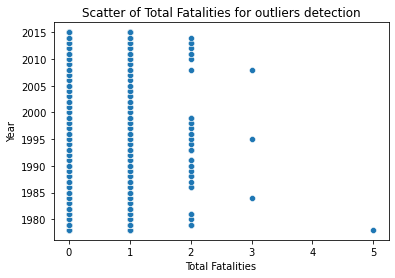

In [43]:
sns.scatterplot(x=av_data['Total Fatalities'],y=av_data.Year)
plt.title('Scatter of Total Fatalities for outliers detection')

Since all the values are realistic, they cannot be identified as outliers.

Identify outliers in “Total Injuries” column visually through a scatterplot.

Text(0.5, 1.0, 'Scatter of Total Injuries for outliers detection')

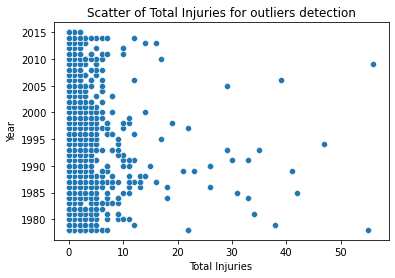

In [44]:
sns.scatterplot(x=av_data['Total Injuries'],y=av_data.Year)
plt.title('Scatter of Total Injuries for outliers detection')

Since the maximum value is not clear visually it’s better to check it through code.

In [45]:
av_data['Total Injuries'].max()

56

Since all the values are realistic, they cannot be identified as outliers.

Identify outliers in “PIC Flight Time Total Hrs” column visually through a scatterplot.

Text(0.5, 1.0, 'Scatter of Pilot In Command flying hours for outliers detection')

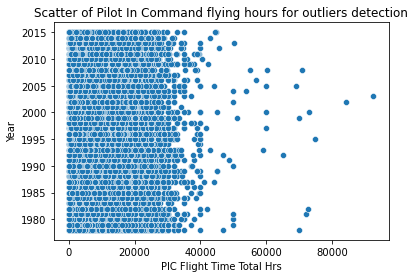

In [46]:
sns.scatterplot(x=av_data['PIC Flight Time Total Hrs'],y=av_data.Year)
plt.title('Scatter of Pilot In Command flying hours for outliers detection')

Visually there seems to be presence of some outliers. So, it should be tried to identify outliers using rules of thumb method.

Calculate mean and standard deviation of the column. Code reference lab week three feedback.

In [47]:
meanPICFTTH = av_data['PIC Flight Time Total Hrs'].mean()
stdPICFTTH = av_data['PIC Flight Time Total Hrs'].std()

Check the value of mean.

In [48]:
meanPICFTTH

3838.574962096057

Check the value of standard deviation.

In [49]:
stdPICFTTH

5508.412809379743

Check the value of twice the mean and if it is greater than the standard deviation.

In [50]:
2*meanPICFTTH

7677.149924192114

Clearly the value of twice the mean is greater than the standard deviation.

But visually it can be seen that a major chunk of the values is greater than this value. Also, this is a data given by FAA which is very much reliable source. As per visual analysis of the scatter plot it is clear that majority of the values are below 40,000. Before considering 40,000 as the limit for considering outlier, it’s better to check how many observations are below the 40,000 value.

In [51]:
av_data[av_data['PIC Flight Time Total Hrs'] < 40000].shape

(79744, 24)

Clearly majority of the observations are below the 40,000 value. So we can consider values equal to or above 40,000 as outliers.

Remove observations which fall under the outlier’s category for this column.

In [52]:
av_data = av_data[av_data['PIC Flight Time Total Hrs'] < 40000]

Check the changes in the number of rows.

In [53]:
av_data.shape

(79744, 24)

Now check the maximum value of the column from which the outliers have been removed.

In [54]:
av_data['PIC Flight Time Total Hrs'].max()

39960.0

Identify outliers in “PIC Flight Time Total Make-Model” column visually through a scatterplot.

Text(0.5, 1.0, 'Scatter of Pilot In Command flying hours of specific model for outliers detection')

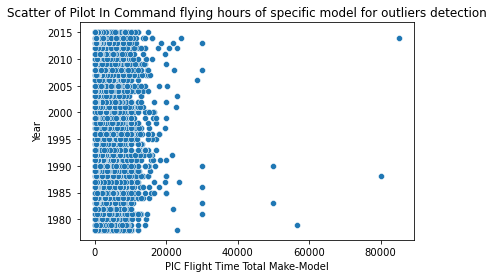

In [55]:
sns.scatterplot(x=av_data['PIC Flight Time Total Make-Model'],y=av_data.Year)
plt.title('Scatter of Pilot In Command flying hours of specific model for outliers detection')

Visually there seems to be presence of some outliers. So, it should be tried to identify outliers using rules of thumb method.

Calculate mean and standard deviation of the column. Code reference lab week three feedback.

In [56]:
meanPICFTTMM = av_data['PIC Flight Time Total Make-Model'].mean()
stdPICFTTMM = av_data['PIC Flight Time Total Make-Model'].std()

Check the value of mean.

In [57]:
meanPICFTTMM

749.6852065839818

Check the value of standard deviation.

In [58]:
stdPICFTTMM

1629.2628862677227

Check the value of twice the mean and if it is greater than the standard deviation.

In [59]:
2*meanPICFTTMM

1499.3704131679635

Clearly the value of twice the mean is lesser than the standard deviation.

Check the value of thrice the mean and if it is greater than the standard deviation.

In [60]:
3*meanPICFTTMM

2249.0556197519454

Clearly the value of thrice the mean is greater than the standard deviation.

But visually it can be seen that a major chunk of the values is greater than this value. Also, this is a data given by FAA which is very much reliable source. As per visual analysis of the scatter plot it is clear that majority of the values are below 20,000. Before considering 20,000 as the limit for considering outlier, it’s better to check how many observations are below the 20,000 value.

In [61]:
av_data[av_data['PIC Flight Time Total Make-Model'] < 20000].shape

(77854, 24)

Clearly majority of the observations are below the 20,000 value. So we can consider values equal to or above 20,000 as outliers.

Remove observations which fall under the outlier’s category for this column.

In [62]:
av_data = av_data[av_data['PIC Flight Time Total Make-Model'] < 20000]

Check the changes in the number of rows.

In [63]:
av_data.shape

(77854, 24)

Now check the maximum value of the column from which the outliers have been removed.

In [64]:
av_data['PIC Flight Time Total Make-Model'].max()

19500.0

It can be clearly observed that removal of observations based on outliers have reduced the number of observations of the data frame by more than 20%. The column “Severe” is a useful column that has been derived from the original data and it’s a good idea to check the changes in that column, as a result of the removal of observations.

In [65]:
av_data.Severe.value_counts()

0    77565
1      289
Name: Severe, dtype: int64

It can be seen that the number of observations with a positive severe value have reduced to a great extent. So, it’s better not to remove observations any further at overall level but do it only at a subset level. At overall level the data is prepared enough to answer the first research question.

##### Research Question 1

##### What was the trend of number of accidents over the years? From the available data what could be a possible factor for that trend.

Since each observation is an incident, one of the good ideas to answer this research question is bye showing the count plot of the years. Code reference: https://seaborn.pydata.org/generated/seaborn.countplot.html

Text(0.5, 1.0, 'Trend of number of Air Incidents over the years')

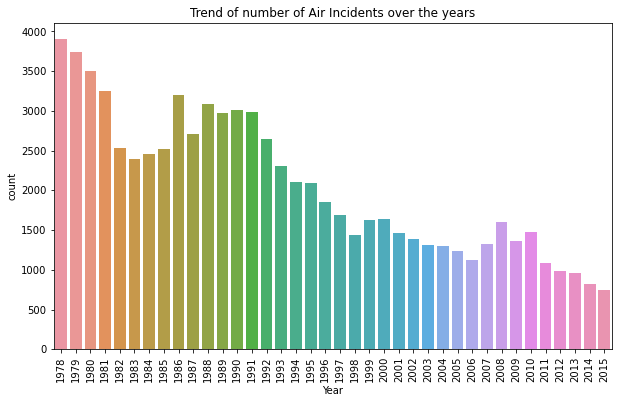

In [66]:
plt.figure(figsize=(10,6))
yr = sns.countplot(x=av_data.Year)
yr.set_xticklabels(yr.get_xticklabels(), rotation=90);
plt.title('Trend of number of Air Incidents over the years')

As per the plot the number of incidents has decreased over the time in general, although there have been some surges intermittently.

The experience of the pilot in command is one of the common factors available in the given data and it is represented here in the column “PIC Flight Time Total Hrs”. It’s a nice idea to plot this column and try to correlate it with the trend of number of incidents.

Text(0.5, 1.0, 'Trend of Pilot In Command flying hours over the years')

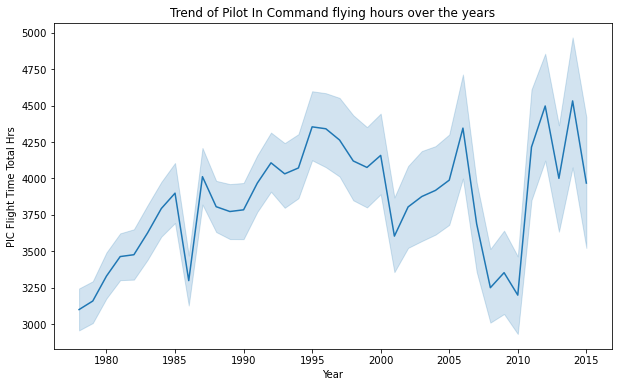

In [67]:
plt.figure(figsize=(10,6))
sns.lineplot(x=av_data.Year,y=av_data['PIC Flight Time Total Hrs'])
plt.title('Trend of Pilot In Command flying hours over the years')

Trying to correlate both the plots, one can clearly observe that whenever there was a surge in the number of incidents there was a dip in the experience of the pilot in command. So, the experience of the pilot in command could be one of the key factors for the cause of the incidents.

The flight phase is another common factor available in the given data and it is represented here in the column “Flight Phase”. 

Text(0.5, 1.0, 'Counts of Flight Phases of Air Incidents over the years')

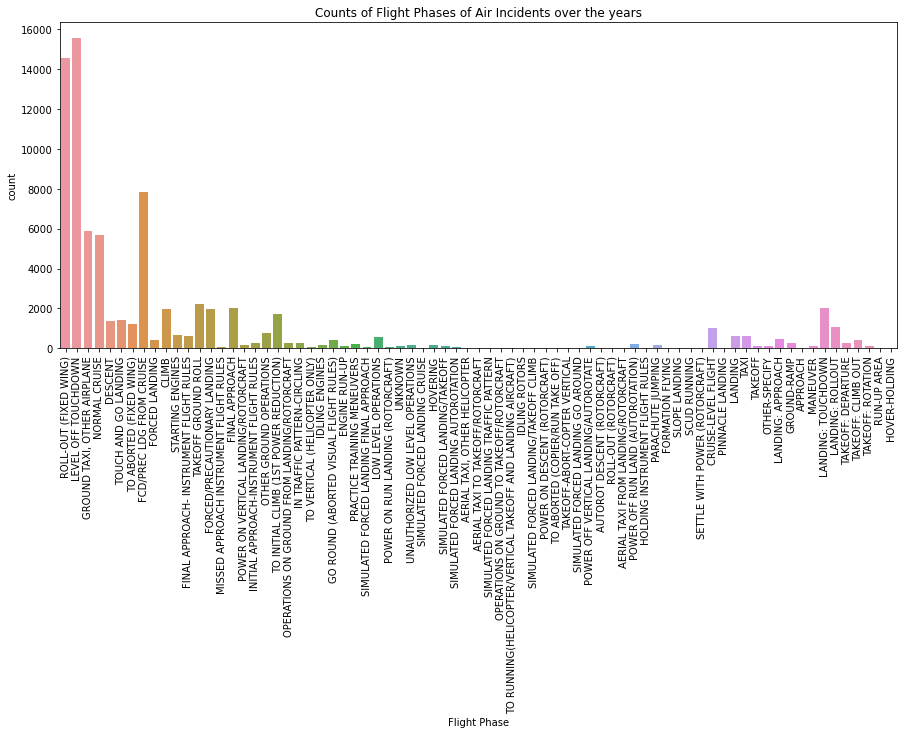

In [68]:
plt.figure(figsize=(15,6))
ovrlfp = sns.countplot(x=av_data['Flight Phase'])
ovrlfp.set_xticklabels(ovrlfp.get_xticklabels(), rotation=90);
plt.title('Counts of Flight Phases of Air Incidents over the years')

The plot indicates that the level off touchdown is the phase in which the most number of incidents happened. This phase is part of landing procedure. From the answer of the first research question, a point to check is the experience of pilot in command for the incidents with this flight phase.

##### Data derivation

Create a subset of data frame where the flight phase is level of touchdown.

In [69]:
lvl_touch_data = pd.DataFrame(av_data.loc[av_data['Flight Phase'] == 'LEVEL OFF TOUCHDOWN', 'PIC Flight Time Total Hrs'])

Have a glance of the subset data frame.

In [70]:
lvl_touch_data.head()

,PIC Flight Time Total Hrs
3,2000.0
11,2300.0
12,2300.0
23,4400.0
34,4000.0


Check the majority values of the column. Code reference: https://www.youtube.com/watch?v=7sJaRHF03K8

In [71]:
lvl_touch_data["PIC Flight Time Total Hrs"].quantile(0.75)

3000.0

So, the experience of majority of pilots in command for the incidents where the flight phase was level off touchdown, is less than the mean value of the experience of pilot in command in overall. This concurs with the answer of the first research question.

From the count plot of years, it can be seen that there was a surge in number of incidents between the years 1978 and 1980. Investigate the flight phase and experience of pilot in command during this period.

##### Data derivation

Create a subset of data for years between 1978 and 1980.

In [72]:
yrs_3high = av_data[(av_data.Year >= 1978) & (av_data.Year <= 1980)]

Check the dimensions of the subset data frame.

In [73]:
yrs_3high.shape

(11163, 24)

Explore the flight phase of the subset through count plot.

Text(0.5, 1.0, 'Counts of Flight Phases of Air Incidents for peak years of incidents')

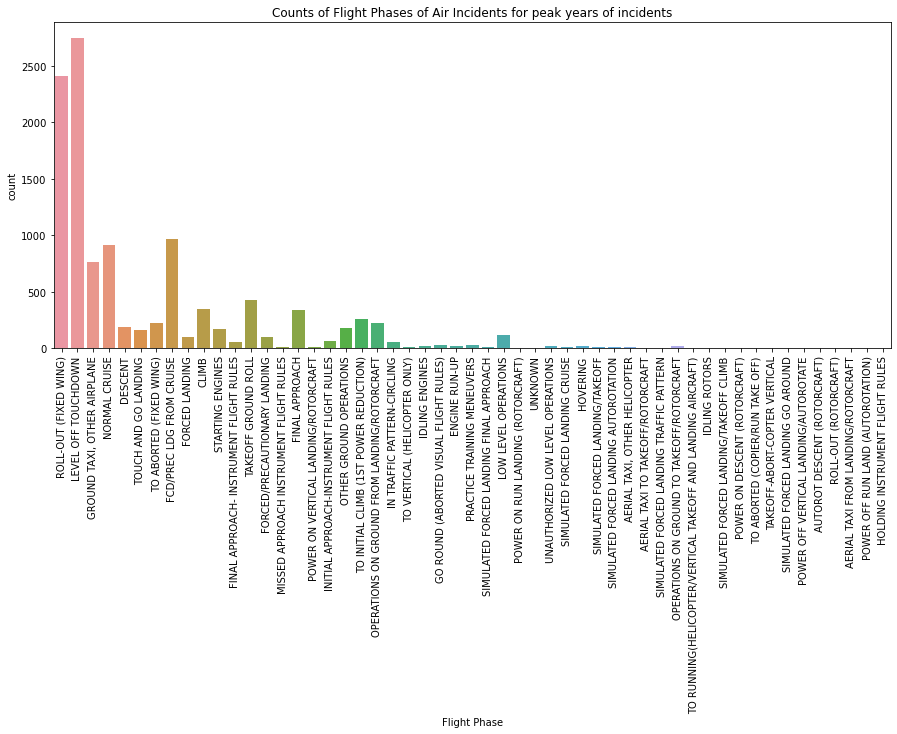

In [74]:
plt.figure(figsize=(15,6))
y3hfp = sns.countplot(x=yrs_3high['Flight Phase'])
y3hfp.set_xticklabels(y3hfp.get_xticklabels(), rotation=90);
plt.title('Counts of Flight Phases of Air Incidents for peak years of incidents')

In this period too, the level off touchdown is the phase in which the most number of incidents happened. Explore the experience of pilot in command for this period too.

##### Data derivation

Create a further subset of the subset data frame where the flight phase is level of touchdown.

In [75]:
lvl_touch_data_1 = pd.DataFrame(yrs_3high.loc[yrs_3high['Flight Phase'] == 'LEVEL OFF TOUCHDOWN', 'PIC Flight Time Total Hrs'])

Have a glance of the subset data frame.

In [76]:
lvl_touch_data_1.head()

,PIC Flight Time Total Hrs
3,2000.0
11,2300.0
12,2300.0
23,4400.0
34,4000.0


Check the majority values of the column. 

In [77]:
lvl_touch_data_1['PIC Flight Time Total Hrs'].quantile(0.75)

2601.5

Again, the experience of pilot in command is less than the mean of the experience of pilot in command in overall.

From the count plot of years, it can be seen that there was a surge in the number of incidents between the years 1986 and 1981. So, repeat the above procedure for this period too to check if the flight phase and experience of the pilot in command display a similar trend.

In [78]:
yrs_surge1 = av_data[(av_data.Year >= 1986) & (av_data.Year <= 1991)]

In [79]:
yrs_surge1.shape

(17968, 24)

Text(0.5, 1.0, 'Counts of Flight Phases of Air Incidents for years of highest surge in incidents')

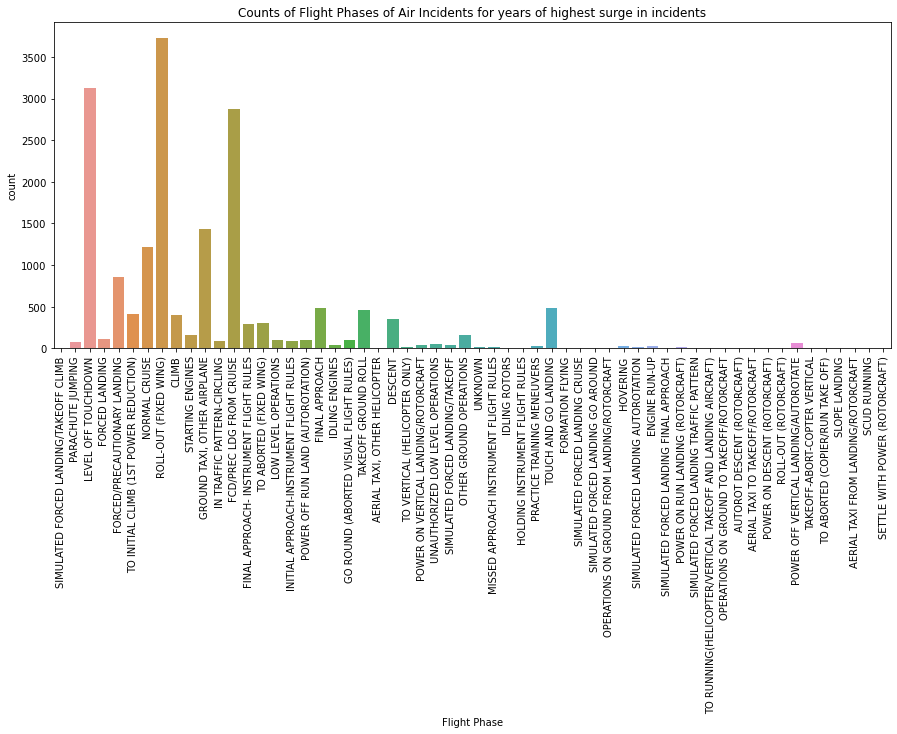

In [80]:
plt.figure(figsize=(15,6))
ysfp1 = sns.countplot(x=yrs_surge1['Flight Phase'])
ysfp1.set_xticklabels(ysfp1.get_xticklabels(), rotation=90);
plt.title('Counts of Flight Phases of Air Incidents for years of highest surge in incidents')

Interestingly for this period, roll out fixed wing was the flight phase in which most of the incidents occurred. But again, this is also a part of landing procedure and so it makes sense to check the pilot experience for this case too.

In [81]:
rollout_data = pd.DataFrame(yrs_3high.loc[yrs_3high['Flight Phase'] == 'ROLL-OUT (FIXED WING)', 'PIC Flight Time Total Hrs'])

In [82]:
rollout_data.head()

,PIC Flight Time Total Hrs
0,245.0
1,200.0
9,90.0
18,200.0
30,5500.0


In [83]:
rollout_data['PIC Flight Time Total Hrs'].quantile(0.75)

3108.0

The experience of pilot in command is again showing a similar trend as for the above cases.

So, it could be possible that the answer to the first research question might have been influenced by these different periods of incidents.

Check the trend of number of severe incidents over the years and the type of damage caused to the aircrafts in these cases.

Text(0.5, 1.0, 'Trend of number of Severe Incidents over the years')

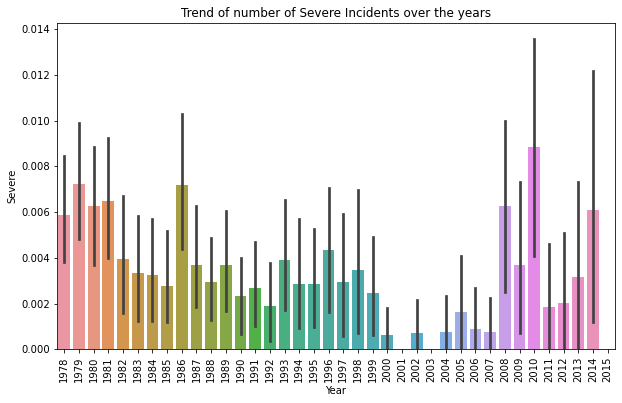

In [84]:
plt.figure(figsize=(10,6))
yr_sr = sns.barplot(x=av_data.Year,y=av_data.Severe)
yr_sr.set_xticklabels(yr_sr.get_xticklabels(), rotation = 90);
plt.title('Trend of number of Severe Incidents over the years')

Text(0.5, 1.0, 'Trend of Damage to the aircraft in relation to Severe incidents')

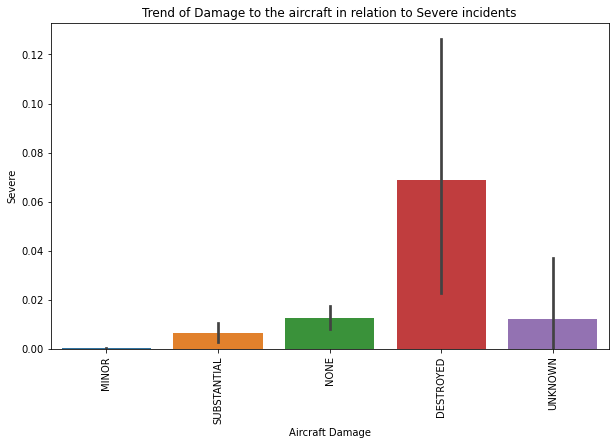

In [85]:
plt.figure(figsize=(10,6))
dam_sr = sns.barplot(x=av_data['Aircraft Damage'],y=av_data.Severe)
dam_sr.set_xticklabels(dam_sr.get_xticklabels(), rotation = 90);
plt.title('Trend of Damage to the aircraft in relation to Severe incidents')

From the above two plots it is not so clear, so it’s better to create a subset of data for severe incidents and then explore the same.

##### Data derivation

Create a subset of data for severe incidents with only the year, the severe and the aircraft damage columns.

In [86]:
years_sever = pd.DataFrame({'Year':av_data.Year,'Severe':av_data.Severe,'Aircraft Damage':av_data['Aircraft Damage']})

In [87]:
years_sever = years_sever[years_sever.Severe == 1]

Check the dimensions of this subset data frame.

In [88]:
years_sever.shape

(289, 3)

Check the trends of incidents over years and type of aircraft damage for this subset.

Text(0.5, 1.0, 'Trend of number of Severe Air Incidents over the years')

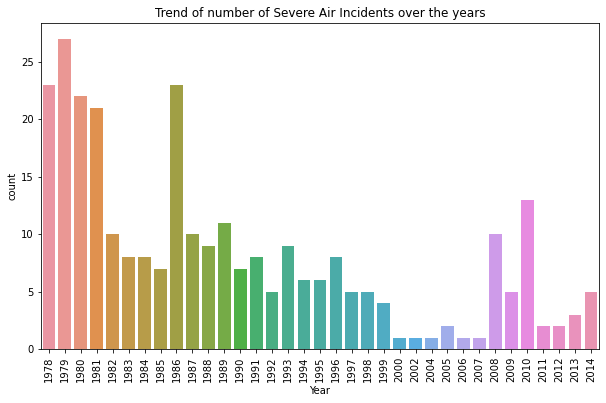

In [89]:
plt.figure(figsize=(10,6))
yrsr_count = sns.countplot(x=years_sever.Year)
yrsr_count.set_xticklabels(yrsr_count.get_xticklabels(), rotation=90);
plt.title('Trend of number of Severe Air Incidents over the years')

Text(0.5, 1.0, 'Trend of Damage to the aircraft for Severe incidents')

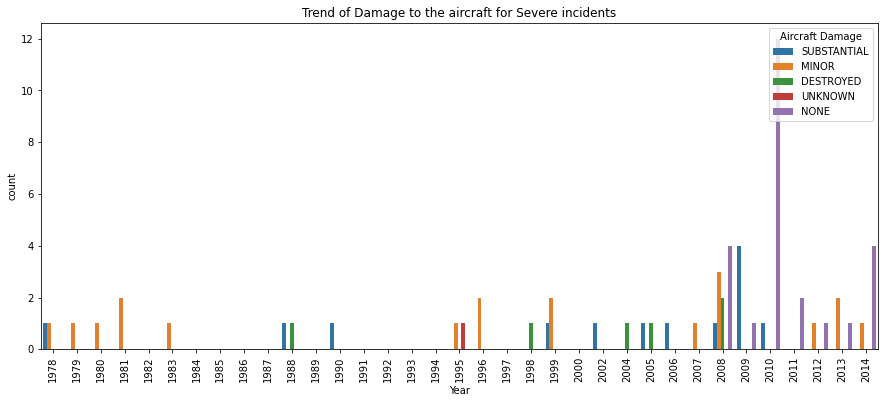

In [90]:
plt.figure(figsize=(15,6))
yrsr_dam = sns.countplot(data=years_sever,x=years_sever.Year,hue="Aircraft Damage")
yrsr_dam.set_xticklabels(yrsr_dam.get_xticklabels(), rotation=90);
plt.title('Trend of Damage to the aircraft for Severe incidents')

The trend of number of severe incidents over the years is very different from that of all the incidents in general.

###### Answer to Researh Question 1.

###### From all the above observations, the answer to the first research question is that the trend of number of incidents has decreased over the time in overall, although there were some surges intermittently. From the given data the factor that appears to create this trend is the increase and/or decrease in the flight hours of the pilot in command.

###### The remaining research questions are not based on the whole data in general but are specific to group of variables on different basis. So, further analysis would be done on different basis and hence will be done over subsets of data with different groups of features. 

For this purpose, a true copy of the data set is created.

In [91]:
av_data_copy = av_data.copy()

Have a glance and check the copy data frame.

##### Research Question 2 - location basis

###### Which was the most dangerous location and what could be the possible factors from the given data due to which that location was the most dangerous.

To answer this question, we choose the event airport as the main column and create a subset of data with all the relevant columns.

In [92]:
loc_basis_data = av_data_copy[['Event City','Event Airport','Aircraft Damage','Flight Phase','Primary Flight Type',
             'Flight Conduct Code','Flight Plan Filed Code','Aircraft Registration Nbr','Year','Severe']]

Have a glance of the created subset.

In [93]:
loc_basis_data.head()

,Event City,Event Airport,Aircraft Damage,Flight Phase,Primary Flight Type,Flight Conduct Code,Flight Plan Filed Code,Aircraft Registration Nbr,Year,Severe
0,WAHPETON,BRECKENRIDGE,MINOR,ROLL-OUT (FIXED WING),PERSONAL,GENERAL OPERATING RULES,NONE,2691Q,1978,0
1,FAIRBANKS,FAIRBANKS INTL,MINOR,ROLL-OUT (FIXED WING),PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,4073E,1978,0
3,CARLSBAD,MC CLELLAN-PALOMAR,MINOR,LEVEL OFF TOUCHDOWN,PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,2250F,1978,0
4,TROUTDALE,TROUTDALE MUNI,MINOR,"GROUND TAXI, OTHER AIRPLANE",PERSONAL,GENERAL OPERATING RULES,NONE,738FD,1978,0
7,LAFAYETTE,PURDUE UNIVERSITY,NaN,NORMAL CRUISE,OTHER,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,27196,1978,0


In [94]:
loc_basis_data.shape

(77854, 10)

Check missing values for the created subset. Code reference: https://www.kaggle.com/itssuru/eda-cristiano-ronaldo-s-career

In [95]:
loc_basis_data.isnull().sum()

Event City                    6552
Event Airport                15123
Aircraft Damage              16828
Flight Phase                   108
Primary Flight Type           8182
Flight Conduct Code             44
Flight Plan Filed Code        9891
Aircraft Registration Nbr        0
Year                             0
Severe                           0
dtype: int64

It can be seen that the key column event airport has a lot of missing values which needs to be dropped. But this may also lead to drop in the number of observations which are severe. So instead of dropping the missing values in the subset, it’s better to do the analysis of the subset in two different sections, that is one for not severe cases and the other for severe cases.

Check the count of not severe and severe incidents.

In [96]:
loc_basis_data.Severe.value_counts()

0    77565
1      289
Name: Severe, dtype: int64

Create a further subset of not severe incidents.

In [97]:
loc_basis_notsevere = loc_basis_data[loc_basis_data.Severe == 0]

Find the airport with highest number of incidents for not severe incidents. Code reference: https://www.youtube.com/watch?v=FdudxZN6rIo

In [98]:
loc_basis_notsevere['Event Airport'].value_counts().index[0]

'DENVER INTL'

Create a further subset data frame exclusively for this airport.

In [99]:
High_Inci_Airpt = loc_basis_notsevere[loc_basis_notsevere['Event Airport'] == 
                                      loc_basis_notsevere['Event Airport'].value_counts().index[0]]

Check the data for him exclusive to this airport.

In [100]:
High_Inci_Airpt

,Event City,Event Airport,Aircraft Damage,Flight Phase,Primary Flight Type,Flight Conduct Code,Flight Plan Filed Code,Aircraft Registration Nbr,Year,Severe
1079,DENVER,DENVER INTL,MINOR,"GROUND TAXI, OTHER AIRPLANE",BUSINESS,GENERAL OPERATING RULES,NONE,19RF,1978,0
1272,DENVER,DENVER INTL,MINOR,LEVEL OFF TOUCHDOWN,PERSONAL,GENERAL OPERATING RULES,NONE,1751W,1978,0
1708,DENVER,DENVER INTL,MINOR,"GROUND TAXI, OTHER AIRPLANE",EXECUTIVE,GENERAL OPERATING RULES,INSTRUMENT FLIGHT RULES,69489,1978,0
2149,DENVER,DENVER INTL,MINOR,TO ABORTED (FIXED WING),AIR TAXI (SCHEDULED- NOT COMMUTER),AIR TAXI/COMMUTER,INSTRUMENT FLIGHT RULES,33FE,1978,0
3100,DENVER,DENVER INTL,NaN,CLIMB,PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,5612P,1978,0
...,...,...,...,...,...,...,...,...,...,...
97858,DENVER,DENVER INTL,NONE,LANDING: APPROACH,NaN,AIR CARRIER/COMMERCIAL,NaN,644RW,2014,0
98661,DENVER,DENVER INTL,MINOR,TAKEOFF: ROTATION,NaN,GENERAL OPERATING RULES,NaN,694ES,2014,0
99459,DENVER,DENVER INTL,NONE,LANDING: TOUCHDOWN,NaN,AIR CARRIER/COMMERCIAL,NaN,200NN,2015,0
99588,MAX,DENVER INTL,MINOR,CRUISE-LEVEL FLIGHT,NaN,AIR CARRIER/COMMERCIAL,NaN,332NW,2015,0


Explore various columns of this data frame and note the observations.

In [101]:
High_Inci_Airpt['Flight Phase'].value_counts()

ROLL-OUT (FIXED WING)                           46
LEVEL OFF TOUCHDOWN                             43
GROUND TAXI, OTHER AIRPLANE                     42
CLIMB                                           23
TAKEOFF GROUND ROLL                             19
FCD/PREC LDG FROM CRUISE                        19
NORMAL CRUISE                                   17
FINAL APPROACH                                  13
TO INITIAL CLIMB (1ST POWER REDUCTION)          12
TO ABORTED (FIXED WING)                         10
OTHER GROUND OPERATIONS                         10
FORCED/PRECAUTIONARY LANDING                     8
CRUISE-LEVEL FLIGHT                              6
DESCENT                                          5
INITIAL APPROACH-INSTRUMENT FLIGHT RULES         4
FINAL APPROACH- INSTRUMENT FLIGHT RULES          4
LANDING: TOUCHDOWN                               3
LANDING: APPROACH                                3
TOUCH AND GO LANDING                             3
SIMULATED FORCED LANDING AUTORO

In [102]:
High_Inci_Airpt['Flight Conduct Code'].value_counts()

GENERAL OPERATING RULES    135
AIR CARRIER/COMMERCIAL     110
AIR TAXI/COMMUTER           71
TRAVEL CLUB                  1
Name: Flight Conduct Code, dtype: int64

In [103]:
High_Inci_Airpt['Flight Plan Filed Code'].value_counts()

INSTRUMENT FLIGHT RULES    174
NONE                        69
VISUAL FLIGHT RULES         31
UNKNOWN                     18
Name: Flight Plan Filed Code, dtype: int64

In [104]:
High_Inci_Airpt['Aircraft Registration Nbr'].value_counts()

3149Z    2
67TC     2
32017    2
100UX    2
2MM      2
        ..
5832L    1
33LK     1
52655    1
9277V    1
5079E    1
Name: Aircraft Registration Nbr, Length: 311, dtype: int64

In [105]:
High_Inci_Airpt.Year.value_counts()

1981    29
1983    29
1982    22
1979    20
1984    19
1986    18
1985    16
1978    13
1992    13
1988    11
1993     8
1997     8
1989     7
2009     7
2010     7
1980     7
1999     6
1991     6
1994     6
2008     6
2005     6
1996     5
1998     5
1995     5
1987     5
2001     4
2003     4
2011     4
2000     3
2006     3
2007     3
1990     3
2012     3
2015     3
2014     2
2004     1
Name: Year, dtype: int64

After exploring various columns, a notable observation is that except for flight phase column, all the other columns seem to have indeterminant indications. Although the flight phase indications seem to be in line with the answer to the first research question, but in context of the airport this may also mean the poor infrastructure and maintenance of the airport.

Repeat the above steps for severe incidents and note the observations.

In [106]:
loc_basis_severe = loc_basis_data[loc_basis_data.Severe == 1]

In [107]:
loc_basis_severe['Event Airport'].value_counts().index[0]

'RENO/STEAD'

In [108]:
Most_Sev_Airpt = loc_basis_severe[loc_basis_severe['Event Airport'] == 
                                  loc_basis_severe['Event Airport'].value_counts().index[0]]

In [109]:
Most_Sev_Airpt

,Event City,Event Airport,Aircraft Damage,Flight Phase,Primary Flight Type,Flight Conduct Code,Flight Plan Filed Code,Aircraft Registration Nbr,Year,Severe
10005,RENO,RENO/STEAD,NaN,NORMAL CRUISE,OTHER,GENERAL OPERATING RULES,NaN,28378,1980,1
55239,RENO,RENO/STEAD,NaN,PARACHUTE JUMPING,OTHER,GENERAL OPERATING RULES,NONE,4912D,1992,1
90286,RENO,RENO/STEAD,DESTROYED,TO INITIAL CLIMB (1ST POWER REDUCTION),NaN,GENERAL OPERATING RULES,UNKNOWN,4235T,2008,1


In [110]:
Most_Sev_Airpt['Flight Phase'].value_counts()

NORMAL CRUISE                             1
PARACHUTE JUMPING                         1
TO INITIAL CLIMB (1ST POWER REDUCTION)    1
Name: Flight Phase, dtype: int64

In [111]:
Most_Sev_Airpt['Flight Conduct Code'].value_counts()

GENERAL OPERATING RULES    3
Name: Flight Conduct Code, dtype: int64

The first thing to note for severe incidents is that the airport with most incidents is different from that of not severe incidents. The number of observations for severe incidents are very low due to which it is not appropriate to figure out a particular possibility for the cause, from the given data.

###### Answer to Research Question 2

###### From all the above observations, the answer to the second research question was DENVER INTL is the most dangerous airport for not severe incidents and RENO/STEAD was the most dangerous airport for severe incidents. For the not severe incidents, the airport infrastructure seems to be one of the possible reasons for such status to the airport. For the severe incidents, the number of observations are very low and as a result the possible reasons for the status of the airport are inconclusive.

###### Research Question 3 - aircraft basis

###### Which was the most dangerous aircraft and what could be the possible factors from the given data due to which that aircraft was the most dangerous.

To answer this question, we choose the aircraft model as the main column and create a subset of data with all the relevant columns.

In [112]:
aircraft_basis_data = av_data_copy[['Aircraft Make','Aircraft Model','Aircraft Series','Primary Flight Type',
                                    'Flight Conduct Code','Aircraft Engine Model','PIC Flight Time Total Hrs', 'Severe']]

Have a glance of the created subset.

In [113]:
aircraft_basis_data.head()

,Aircraft Make,Aircraft Model,Aircraft Series,Primary Flight Type,Flight Conduct Code,Aircraft Engine Model,PIC Flight Time Total Hrs,Severe
0,CESSNA,182,UNDESIGNATED SERIES,PERSONAL,GENERAL OPERATING RULES,NaN,245.0,0
1,PIPER,PA18,150,PERSONAL,GENERAL OPERATING RULES,NaN,200.0,0
3,CESSNA,310,L,PERSONAL,GENERAL OPERATING RULES,NaN,2000.0,0
4,CESSNA,172,UNDESIGNATED SERIES,PERSONAL,GENERAL OPERATING RULES,NaN,300.0,0
7,PIPER,PA31,350,OTHER,GENERAL OPERATING RULES,NaN,2700.0,0


Check missing values for the created subset. 

In [114]:
aircraft_basis_data.isnull().sum()

Aircraft Make                 1762
Aircraft Model                2198
Aircraft Series               2199
Primary Flight Type           8182
Flight Conduct Code             44
Aircraft Engine Model        48173
PIC Flight Time Total Hrs        0
Severe                           0
dtype: int64

The situation again resembles to that of analysis to the second research question. So, repeat the whole process that was done as part of analysis for the second research question and note the observations.

In [115]:
aircraft_basis_data.Severe.value_counts()

0    77565
1      289
Name: Severe, dtype: int64

In [116]:
aircraft_basis_notsevere = aircraft_basis_data[aircraft_basis_data.Severe == 0]

In [117]:
aircraft_basis_notsevere['Aircraft Model'].value_counts().index[0]

'172'

In [118]:
High_Inci_Model = aircraft_basis_notsevere[aircraft_basis_notsevere['Aircraft Model'] == 
                                      aircraft_basis_notsevere['Aircraft Model'].value_counts().index[0]]

In [119]:
High_Inci_Model

,Aircraft Make,Aircraft Model,Aircraft Series,Primary Flight Type,Flight Conduct Code,Aircraft Engine Model,PIC Flight Time Total Hrs,Severe
4,CESSNA,172,UNDESIGNATED SERIES,PERSONAL,GENERAL OPERATING RULES,NaN,300.0,0
9,CESSNA,172,UNDESIGNATED SERIES,BUSINESS,GENERAL OPERATING RULES,NaN,90.0,0
77,CESSNA,172,UNDESIGNATED SERIES,BUSINESS,GENERAL OPERATING RULES,NaN,1800.0,0
97,CESSNA,172,UNDESIGNATED SERIES,PERSONAL,GENERAL OPERATING RULES,NaN,180.0,0
181,CESSNA,172,UNDESIGNATED SERIES,INSTRUCTION,GENERAL OPERATING RULES,NaN,46.0,0
...,...,...,...,...,...,...,...,...
99877,CESSNA,172,N,NaN,GENERAL OPERATING RULES,0-320 SERIES,445.0,0
99890,CESSNA,172,P,NaN,GENERAL OPERATING RULES,0-320 SERIES,786.0,0
99901,CESSNA,172,K,NaN,GENERAL OPERATING RULES,0-300 SER,120.0,0
99945,CESSNA,172,P,NaN,PILOT SCHOOLS,O-320-D2J,1480.0,0


In [120]:
High_Inci_Model["Aircraft Make"].value_counts()

CESSNA    3943
Name: Aircraft Make, dtype: int64

In [121]:
High_Inci_Model["Aircraft Engine Model"].value_counts()

O320H2AD        294
O320E2D         242
0-320 SERIES    168
O320*           167
O300D           162
               ... 
O320D2C           1
O320E3D           1
IO520*            1
O320A2B           1
O-320-D2J         1
Name: Aircraft Engine Model, Length: 69, dtype: int64

In [122]:
High_Inci_Model["Primary Flight Type"].value_counts()

PERSONAL                                                       2346
INSTRUCTION                                                     883
BUSINESS                                                        125
INDUSTRIAL/SPECIAL                                               53
OTHER                                                            52
AIR TAXI (NON-SCHEDULED)                                         20
FOR HIRE                                                          6
AIR TAXI COMMUTER (SCHEDULED 5 OR MORE ROUNDTRIPS PER WEEK)       5
ILLEGAL DRUG, STOLEN AIRCRAFT, ETC.                               3
EXECUTIVE                                                         1
AIR TAXI (SCHEDULED- NOT COMMUTER)                                1
SUPPLEMENTAL OR COMMERCIAL OPERATOR                               1
Name: Primary Flight Type, dtype: int64

In [123]:
High_Inci_Model["Flight Conduct Code"].value_counts()

GENERAL OPERATING RULES    3802
PILOT SCHOOLS               110
AIR TAXI/COMMUTER            26
PARACHUTE JUMPING             3
Name: Flight Conduct Code, dtype: int64

In [124]:
High_Inci_Model["PIC Flight Time Total Hrs"].quantile(0.75)

750.0

After exploring various columns, two key observations were that the make of the most dangerous aircraft model for not severe incidents is the same and also most of flight types for this was personal.

In [125]:
aircraft_basis_severe = aircraft_basis_data[aircraft_basis_data.Severe == 1]

In [126]:
aircraft_basis_severe['Aircraft Model'].value_counts().index[0]

'182'

In [127]:
Most_Sev_Model = aircraft_basis_severe[aircraft_basis_severe['Aircraft Model'] == 
                                  aircraft_basis_severe['Aircraft Model'].value_counts().index[0]]

In [128]:
Most_Sev_Model

,Aircraft Make,Aircraft Model,Aircraft Series,Primary Flight Type,Flight Conduct Code,Aircraft Engine Model,PIC Flight Time Total Hrs,Severe
638,CESSNA,182,A,OTHER,GENERAL OPERATING RULES,NaN,750.0,1
1926,CESSNA,182,UNDESIGNATED SERIES,OTHER,PARACHUTE JUMPING,NaN,1500.0,1
2290,CESSNA,182,B,PERSONAL,GENERAL OPERATING RULES,NaN,340.0,1
2331,CESSNA,182,A,PERSONAL,GENERAL OPERATING RULES,NaN,135.0,1
2448,CESSNA,182,UNDESIGNATED SERIES,OTHER,PARACHUTE JUMPING,NaN,900.0,1
...,...,...,...,...,...,...,...,...
69325,CESSNA,182,UNDESIGNATED SERIES,INDUSTRIAL/SPECIAL,PARACHUTE JUMPING,NaN,4200.0,1
70571,CESSNA,182,B,INDUSTRIAL/SPECIAL,GENERAL OPERATING RULES,O470U,2400.0,1
89852,CESSNA,182,F,OTHER,GENERAL OPERATING RULES,NaN,0.0,1
92398,CESSNA,182,UNDESIGNATED SERIES,NaN,PARACHUTE JUMPING,O-470 SERIES,0.0,1


In [129]:
Most_Sev_Model['Aircraft Make'].value_counts()

CESSNA    111
Name: Aircraft Make, dtype: int64

In [130]:
Most_Sev_Model['Aircraft Engine Model'].value_counts()

O470L           10
O470*            3
O-470 SERIES     2
O470R            1
O470U            1
Name: Aircraft Engine Model, dtype: int64

In [131]:
Most_Sev_Model['Primary Flight Type'].value_counts()

OTHER                 98
PERSONAL               6
INDUSTRIAL/SPECIAL     4
INSTRUCTION            1
Name: Primary Flight Type, dtype: int64

In [132]:
Most_Sev_Model['Flight Conduct Code'].value_counts()

PARACHUTE JUMPING          89
GENERAL OPERATING RULES    22
Name: Flight Conduct Code, dtype: int64

In [133]:
Most_Sev_Model['PIC Flight Time Total Hrs'].quantile(0.75)

1350.0

For the severe incidents it can be observed that the most dangerous aircraft make is same as that for the not severe incidents. Unlike the not severe incidents, here the factors which might be the possible cause were not so clear.

###### Answer to Research Question 3

###### From all the above observations, the answer to the third research question is that the most dangerous aircraft model for not severe incidents was 172 and that for severe incidents was 182, both of which are CESSNA make. So, aircraft make could possibly be a factor that might have made those two models the most dangerous. The flight type could also be another factor, but it doesn’t appear to be as clear as the aircraft make.

###### Research Question 4 - operator basis

###### Which was the most dangerous operator and what could be the possible factors from the given data due to which that operator was the most dangerous.

To answer this question, the operator would obviously be the main column and create a subset of data with all the relevant columns.

In [134]:
operator_basis_data = av_data_copy[['Aircraft Make','Aircraft Model','Operator','Flight Conduct Code',
                                    'Flight Plan Filed Code','Aircraft Registration Nbr','PIC Certificate Type']]

Have a glance of the created subset.

In [135]:
operator_basis_data

,Aircraft Make,Aircraft Model,Operator,Flight Conduct Code,Flight Plan Filed Code,Aircraft Registration Nbr,PIC Certificate Type
0,CESSNA,182,NaN,GENERAL OPERATING RULES,NONE,2691Q,PRIVATE PILOT
1,PIPER,PA18,NaN,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,4073E,STUDENT
3,CESSNA,310,NaN,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,2250F,COMMERCIAL PILOT FLIGHT INSTRUCTOR
4,CESSNA,172,NaN,GENERAL OPERATING RULES,NONE,738FD,COMMERCIAL PILOT
7,PIPER,PA31,NaN,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,27196,COMMERCIAL PILOT
...,...,...,...,...,...,...,...
99988,AVIAT,A1,NaN,GENERAL OPERATING RULES,NaN,143HP,PRIVATE PILOT
99992,CESSNA,172RG,NaN,GENERAL OPERATING RULES,NaN,9647B,COMMERCIAL PILOT FLIGHT INSTRUCTOR
99996,CESSNA,550,NaN,GENERAL OPERATING RULES,NaN,363CA,UNKNOWN/FOREIGN
99997,CESSNA,172RG,NaN,GENERAL OPERATING RULES,NaN,6545V,PRIVATE PILOT


Check missing values for the created subset.

In [136]:
operator_basis_data.isnull().sum()

Aircraft Make                 1762
Aircraft Model                2198
Operator                     61362
Flight Conduct Code             44
Flight Plan Filed Code        9891
Aircraft Registration Nbr        0
PIC Certificate Type          1239
dtype: int64

From the missing values it can be seen that too much of data for the operator column is missing. So, unlike approach for previous two research questions, here the missing values are to be dropped and the analysis is to be done without segregating data into severe and not severe incidents.

Before dropping the columns, it is better to create a copy of the created subset.

In [137]:
operator_basis_data_copy = operator_basis_data.copy()

Drop observations with missing values in the operator column. Code reference: https://www.kaggle.com/itssuru/eda-cristiano-ronaldo-s-career

In [138]:
operator_basis_data_copy = operator_basis_data_copy.dropna(subset=['Operator'])

Check the data frame.

In [139]:
operator_basis_data_copy

,Aircraft Make,Aircraft Model,Operator,Flight Conduct Code,Flight Plan Filed Code,Aircraft Registration Nbr,PIC Certificate Type
27,BELL,206,PETROLEUM HELICOPTERS,AIR TAXI/COMMUTER,INSTRUMENT FLIGHT RULES,9979K,COMMERCIAL PILOT
29,BELL,206,AIR LOGISTICS,AIR TAXI/COMMUTER,NONE,59516,COMMERCIAL PILOT
30,BEECH,18,MOUNTAIN AIR CARGO,AIR TAXI/COMMUTER,INSTRUMENT FLIGHT RULES,703M,COMMERCIAL PILOT
34,CESSNA,310,SKYCRAFT INC,AIR TAXI/COMMUTER,INSTRUMENT FLIGHT RULES,8240Q,COMMERCIAL PILOT
46,PIPER,PA34,SOLDOTNA AIR SERVICE,AIR TAXI/COMMUTER,VISUAL FLIGHT RULES,41960,COMMERCIAL PILOT
...,...,...,...,...,...,...,...
99945,CESSNA,172,WAYMAN AVIATION SERVICE INC,PILOT SCHOOLS,NaN,5352K,PRIVATE PILOT FLIGHT INSTRUCTOR
99960,BEECH,99,FREIGHT RUNNERS EXPRESS INC,AIR TAXI/COMMUTER,NaN,699CZ,PRIVATE PILOT FLIGHT INSTRUCTOR
99975,CESSNA,172,AMERICAN FLYERS CO INC,PILOT SCHOOLS,NaN,72AF,PRIVATE PILOT FLIGHT INSTRUCTOR
99978,TECNAM,P2006T,UPPER LIMIT AVIATION,GENERAL OPERATING RULES,NaN,245TA,PRIVATE PILOT


Find the operator with highest number of incidents.

In [140]:
operator_basis_data_copy.Operator.value_counts().index[0]

'DELTA AIR LINES INC'

Create a further subset data frame exclusively for this operator.

In [141]:
High_Inci_Operator = operator_basis_data_copy[operator_basis_data_copy.Operator ==
                                             operator_basis_data_copy.Operator.value_counts().index[0]]

Check the data for him exclusive to this operator.

In [142]:
High_Inci_Operator

,Aircraft Make,Aircraft Model,Operator,Flight Conduct Code,Flight Plan Filed Code,Aircraft Registration Nbr,PIC Certificate Type
311,DOUGLAS,DC9,DELTA AIR LINES INC,AIR CARRIER/COMMERCIAL,INSTRUMENT FLIGHT RULES,1289L,AIRLINE TRANSPORT
3146,DOUGLAS,DC8,DELTA AIR LINES INC,AIR CARRIER/COMMERCIAL,INSTRUMENT FLIGHT RULES,809E,AIRLINE TRANSPORT
5791,DOUGLAS,DC9,DELTA AIR LINES INC,AIR CARRIER/COMMERCIAL,INSTRUMENT FLIGHT RULES,NR181,AIRLINE TRANSPORT
9545,LOCKHEED,L1011 385,DELTA AIR LINES INC,FOREIGN AIR CARRIER,INSTRUMENT FLIGHT RULES,714DA,AIRLINE TRANSPORT
9713,DOUGLAS,DC8,DELTA AIR LINES INC,AIR CARRIER/COMMERCIAL,INSTRUMENT FLIGHT RULES,823E,AIRLINE TRANSPORT
...,...,...,...,...,...,...,...
96532,DOUGLAS,DC9,DELTA AIR LINES INC,AIR CARRIER/COMMERCIAL,NaN,770NC,COMMERCIAL PILOT
97026,MCDONNELL DOUGLAS,MD90,DELTA AIR LINES INC,AIR CARRIER/COMMERCIAL,NaN,963DN,AIRLINE TRANSPORT
97817,MCDONNELL DOUGLAS,MD88,DELTA AIR LINES INC,AIR CARRIER/COMMERCIAL,NaN,912DE,COMMERCIAL PILOT FLIGHT INSTRUCTOR
98546,MCDONNELL DOUGLAS,MD88,DELTA AIR LINES INC,AIR CARRIER/COMMERCIAL,NaN,903DE,AIRLINE TRANSPORT


Explore various columns of this data frame and note the observations.

In [143]:
High_Inci_Operator['Aircraft Model'].value_counts()

727          89
MD88         81
757          52
737          48
L1011 385    48
767          24
DC9          21
MD90         14
DC8           6
A320          5
MD11          4
747           2
DC10          1
1329          1
TB10          1
777           1
A330          1
Name: Aircraft Model, dtype: int64

In [144]:
High_Inci_Operator['Aircraft Make'].value_counts()

BOEING               216
MCDONNELL DOUGLAS    100
LOCKHEED              49
DOUGLAS               27
AIRBUS                 6
SOCATA                 1
Name: Aircraft Make, dtype: int64

In [145]:
High_Inci_Operator['Flight Conduct Code'].value_counts()

AIR CARRIER/COMMERCIAL     397
FOREIGN AIR CARRIER          2
GENERAL OPERATING RULES      2
Name: Flight Conduct Code, dtype: int64

In [146]:
High_Inci_Operator['Flight Plan Filed Code'].value_counts()

INSTRUMENT FLIGHT RULES    351
UNKNOWN                     13
VISUAL FLIGHT RULES          2
NONE                         1
Name: Flight Plan Filed Code, dtype: int64

In [147]:
High_Inci_Operator['PIC Certificate Type'].value_counts()

AIRLINE TRANSPORT                            354
AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR     22
COMMERCIAL PILOT                               8
PRIVATE PILOT                                  1
COMMERCIAL PILOT FLIGHT INSTRUCTOR             1
Name: PIC Certificate Type, dtype: int64

In [148]:
High_Inci_Operator['Aircraft Registration Nbr'].value_counts()

953DL    3
982DL    3
831L     3
735D     3
543DA    3
        ..
964DL    1
754DL    1
320DL    1
809E     1
903DE    1
Name: Aircraft Registration Nbr, Length: 318, dtype: int64

###### Answer to Research Question 4

###### From all the observations, the answer to the fourth research question is that the most dangerous operator it was DELTA AIR LINES INC. One of the possible factors due to which this was the most dangerous operator is the aircraft make that is most possessed by the operator. Whether or not the operating procedures of the operator is another possible factor, is inconclusive.

###### Research Question 5 - flight type basis

###### Which was the most dangerous flight type and what could be the possible factors from the given data due to which that flight type was the most dangerous.

To answer this question, the primary flight type would obviously be the main column and create a subset of data with all the relevant columns.

In [149]:
flighttype_basis_data = av_data_copy[['Primary Flight Type','Flight Conduct Code','Flight Plan Filed Code',
                                      'Aircraft Model','PIC Certificate Type','PIC Flight Time Total Hrs']]

Have a glance of the created subset.

In [150]:
flighttype_basis_data

,Primary Flight Type,Flight Conduct Code,Flight Plan Filed Code,Aircraft Model,PIC Certificate Type,PIC Flight Time Total Hrs
0,PERSONAL,GENERAL OPERATING RULES,NONE,182,PRIVATE PILOT,245.0
1,PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,PA18,STUDENT,200.0
3,PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,310,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0
4,PERSONAL,GENERAL OPERATING RULES,NONE,172,COMMERCIAL PILOT,300.0
7,OTHER,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,PA31,COMMERCIAL PILOT,2700.0
...,...,...,...,...,...,...
99988,NaN,GENERAL OPERATING RULES,NaN,A1,PRIVATE PILOT,935.0
99992,NaN,GENERAL OPERATING RULES,NaN,172RG,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2200.0
99996,NaN,GENERAL OPERATING RULES,NaN,550,UNKNOWN/FOREIGN,5500.0
99997,NaN,GENERAL OPERATING RULES,NaN,172RG,PRIVATE PILOT,267.0


Check missing values for the created subset.

In [151]:
flighttype_basis_data.isnull().sum()

Primary Flight Type          8182
Flight Conduct Code            44
Flight Plan Filed Code       9891
Aircraft Model               2198
PIC Certificate Type         1239
PIC Flight Time Total Hrs       0
dtype: int64

The situation again resembles to that of analysis to the fourth research question. So, repeat the whole process that was done as part of analysis for the fourth research question and note the observations.

In [152]:
flighttype_basis_data_copy = flighttype_basis_data.dropna(subset=['Primary Flight Type'])

In [153]:
flighttype_basis_data_copy

,Primary Flight Type,Flight Conduct Code,Flight Plan Filed Code,Aircraft Model,PIC Certificate Type,PIC Flight Time Total Hrs
0,PERSONAL,GENERAL OPERATING RULES,NONE,182,PRIVATE PILOT,245.0
1,PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,PA18,STUDENT,200.0
3,PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,310,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0
4,PERSONAL,GENERAL OPERATING RULES,NONE,172,COMMERCIAL PILOT,300.0
7,OTHER,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,PA31,COMMERCIAL PILOT,2700.0
...,...,...,...,...,...,...
90254,SCHEDULED AIR CARRIER,AIR CARRIER/COMMERCIAL,INSTRUMENT FLIGHT RULES,737,NaN,0.0
90272,EXECUTIVE,GENERAL OPERATING RULES,UNKNOWN,1125,NaN,0.0
90284,PERSONAL,GENERAL OPERATING RULES,UNKNOWN,36,PRIVATE PILOT,1000.0
90289,PERSONAL,GENERAL OPERATING RULES,NONE,TAIFUN17E,PRIVATE PILOT,300.0


In [154]:
flighttype_basis_data_copy['Primary Flight Type'].value_counts().index[0]

'PERSONAL'

In [155]:
High_Inci_Flighttype = flighttype_basis_data_copy[flighttype_basis_data_copy['Primary Flight Type'] ==
                                                 flighttype_basis_data_copy['Primary Flight Type'].value_counts().index[0]]

In [156]:
High_Inci_Flighttype

,Primary Flight Type,Flight Conduct Code,Flight Plan Filed Code,Aircraft Model,PIC Certificate Type,PIC Flight Time Total Hrs
0,PERSONAL,GENERAL OPERATING RULES,NONE,182,PRIVATE PILOT,245.0
1,PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,PA18,STUDENT,200.0
3,PERSONAL,GENERAL OPERATING RULES,VISUAL FLIGHT RULES,310,COMMERCIAL PILOT FLIGHT INSTRUCTOR,2000.0
4,PERSONAL,GENERAL OPERATING RULES,NONE,172,COMMERCIAL PILOT,300.0
8,PERSONAL,GENERAL OPERATING RULES,NONE,150,PRIVATE PILOT,450.0
...,...,...,...,...,...,...
90244,PERSONAL,GENERAL OPERATING RULES,UNKNOWN,NaN,PILOT NOT CERTIFICATED,0.0
90249,PERSONAL,GENERAL OPERATING RULES,UNKNOWN,CHALLENGER,PRIVATE PILOT,1200.0
90284,PERSONAL,GENERAL OPERATING RULES,UNKNOWN,36,PRIVATE PILOT,1000.0
90289,PERSONAL,GENERAL OPERATING RULES,NONE,TAIFUN17E,PRIVATE PILOT,300.0


In [157]:
High_Inci_Flighttype['Primary Flight Type'].value_counts()

PERSONAL    36115
Name: Primary Flight Type, dtype: int64

In [158]:
High_Inci_Flighttype['Flight Conduct Code'].value_counts()

GENERAL OPERATING RULES    36044
PILOT SCHOOLS                 23
ULTRALIGHT VEHICLES           21
AIR TAXI/COMMUTER             10
PARACHUTE JUMPING              8
AIR CARRIER/COMMERCIAL         5
AGRICULTURAL                   2
Name: Flight Conduct Code, dtype: int64

In [159]:
High_Inci_Flighttype['Flight Plan Filed Code'].value_counts()

NONE                           19843
UNKNOWN                         7420
VISUAL FLIGHT RULES             4529
INSTRUMENT FLIGHT RULES         2752
SPECIAL VISUAL FLIGHT RULES       19
VISUAL FLIGHT FOLLOWING           10
DEFENSE VISUAL FLIGHT RULES        9
MILITARY CONTROL                   9
AIR TAXI FLIGHT FOLLOWING          7
Name: Flight Plan Filed Code, dtype: int64

In [160]:
High_Inci_Flighttype['Aircraft Model'].value_counts()

172         2349
PA28        2297
35          1316
182         1293
150         1090
            ... 
69A            1
N65            1
CH47           1
1101           1
VENTUS B       1
Name: Aircraft Model, Length: 811, dtype: int64

In [161]:
High_Inci_Flighttype['PIC Certificate Type'].value_counts()

PRIVATE PILOT                                21558
COMMERCIAL PILOT                              7891
AIRLINE TRANSPORT                             2150
COMMERCIAL PILOT FLIGHT INSTRUCTOR            1762
STUDENT                                       1198
AIRLINE TRANSPORT PILOT FLIGHT INSTRUCTOR      735
UNKNOWN/FOREIGN                                458
PILOT NOT CERTIFICATED                          64
PRIVATE PILOT FLIGHT INSTRUCTOR                 20
RECREATIONAL PILOT                               9
SPECIAL PURPOSE                                  7
Name: PIC Certificate Type, dtype: int64

In [162]:
High_Inci_Flighttype['PIC Flight Time Total Hrs'].value_counts()

2000.0    639
3000.0    575
1000.0    570
500.0     551
1500.0    521
         ... 
3685.0      1
6459.0      1
3337.0      1
2290.0      1
3401.0      1
Name: PIC Flight Time Total Hrs, Length: 3519, dtype: int64

###### Answer to Research Question 5

###### From all the observations above, the answer to the fifth research question is that the most dangerous flight type was PERSONAL. One of the possible factors due to which this was the most dangerous flight type is the experience of the pilot in command. The observations regarding pilot experience are similar to the analysis done for the third research question and the analysis for both third and fifth research questions seem to be supporting each other.

###### Research Question 6 - engine basis

###### Which was the most dangerous engine and what could be the possible factors from the given data due to which that engine was the most dangerous.

To answer this question, we choose the engine model as the main column and create a subset off data with all the relevant columns.

In [163]:
engine_basis_data = av_data_copy[['Aircraft Engine Make','Aircraft Engine Model','Engine Group Code','Nbr of Engines']]

Have a glance of the created subset.

In [164]:
engine_basis_data

,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines
0,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,1.0
7,NaN,NaN,NaN,2.0
...,...,...,...,...
99988,LYCOMI,0-320 SERIES,NaN,NaN
99992,LYCOMI,O&VO-360 SER,360,1.0
99996,P&W CA,PW530A,NaN,2.0
99997,LYCOMI,O&VO-360 SER,NaN,1.0


Check missing values for the created subset.

In [165]:
engine_basis_data.isnull().sum()

Aircraft Engine Make     48179
Aircraft Engine Model    48173
Engine Group Code        53128
Nbr of Engines            4703
dtype: int64

The situation again resembles to that of analysis to the fourth and fifth research question. So, repeat the whole process that was done as part of analysis for the fourth and fifth research question and note the observations.

In [166]:
engine_basis_data_copy = engine_basis_data.dropna(subset=['Aircraft Engine Model'])

In [167]:
engine_basis_data_copy

,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines
17,CONT,IO470E,O470,1.0
20,CONT,O200A,O200,1.0
27,ALLSN,250C20B,250C,1.0
52,LYC,O540E4B5,O540,1.0
56,LYC,O360A2A,O360,1.0
...,...,...,...,...
99988,LYCOMI,0-320 SERIES,NaN,NaN
99992,LYCOMI,O&VO-360 SER,360,1.0
99996,P&W CA,PW530A,NaN,2.0
99997,LYCOMI,O&VO-360 SER,NaN,1.0


In [168]:
engine_basis_data_copy['Aircraft Engine Model'].value_counts().index[0]

'O235L2C'

In [169]:
High_Inci_Engine = engine_basis_data_copy[engine_basis_data_copy['Aircraft Engine Model'] ==
                                         engine_basis_data_copy['Aircraft Engine Model'].value_counts().index[0]]

In [170]:
High_Inci_Engine

,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines
3722,LYC,O235L2C,O235,1.0
3730,LYC,O235L2C,O235,1.0
5966,LYC,O235L2C,O235,1.0
6134,LYC,O235L2C,O235,1.0
6842,LYC,O235L2C,O235,1.0
...,...,...,...,...
89493,LYC,O235L2C,O235,1.0
89960,LYC,O235L2C,O235,1.0
90006,LYC,O235L2C,O235,1.0
90591,LYC,O235L2C,O235,1.0


In [171]:
High_Inci_Engine['Aircraft Engine Make'].value_counts()

LYC    961
Name: Aircraft Engine Make, dtype: int64

In [172]:
High_Inci_Engine['Engine Group Code'].value_counts()

O235    961
Name: Engine Group Code, dtype: int64

In [173]:
High_Inci_Engine['Nbr of Engines'].value_counts()

1.0    959
Name: Nbr of Engines, dtype: int64

###### Answer to Research Question 6

###### From all the observations above the answer to the sixth research question is that the most dangerous engine model was O235L2C, which is of LYC make. One of the possible factors due to which this was the most dangerous engine is the make of the engine.

#### All the Research questions have been answered through the analysis of the data.